#  Reference template based classifier 
## Case 2: Mean vector and covariance matrix as reference template for a class

In [3]:
import numpy as np

# Function to load data from txt files
def load_data(file_path):
    data = np.loadtxt(file_path)
    features = data[:, :2]  # First two columns are features
    labels = data[:, 2].astype(int)  # Third column is class labels
    return features, labels

# Function to compute the mean vector and covariance matrix for each class
def compute_reference_templates(features, labels, class_labels):
    templates = {}
    for c in class_labels:
        class_features = features[labels == c]
        mean_vector = np.mean(class_features, axis=0)
        covariance_matrix = np.cov(class_features, rowvar=False)
        templates[c] = (mean_vector, covariance_matrix)
    return templates

# Function to compute Mahalanobis distance
def mahalanobis_distance(x, mean, covariance_inv):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff, covariance_inv), diff.T))

# Function to classify a new sample
def classify(x, templates):
    distances = []
    for c, (mean, cov_matrix) in templates.items():
        cov_inv = np.linalg.inv(cov_matrix)
        distance = mahalanobis_distance(x, mean, cov_inv)
        distances.append(distance)
    return min([(dist, c) for dist, c in zip(distances, templates.keys())])[1]

# Load data
train_features, train_labels = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt")
test_features, test_labels = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt")

class_labels = [1, 2] 
templates = compute_reference_templates(train_features, train_labels, class_labels)

# Classify the test samples
predictions = [classify(x, templates) for x in test_features]

# Evaluate the classifier (accuracy)
accuracy = np.sum(predictions == test_labels) / len(test_labels)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.80


### Decision region plot for all the classes together with the training data superposed 

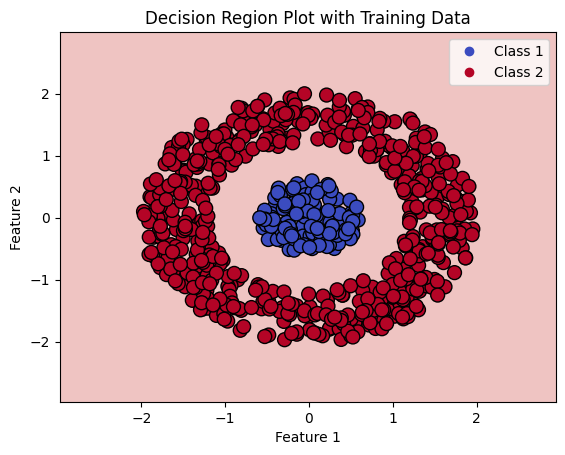

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the decision regions and training data
def plot_decision_regions(features, labels, templates, class_labels):
    # Create a grid of points covering the feature space
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),  # Finer grid resolution
                         np.arange(y_min, y_max, 0.02))   # Smaller step size
    
    # Classify each point on the grid
    Z = np.array([classify(np.array([x, y]), templates) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundaries (contour plot)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Plot the training data points
    scatter = plt.scatter(features[:, 0], features[:, 1], c=labels, cmap=plt.cm.coolwarm, edgecolors='k', s=100, marker='o')
    
    plt.title("Decision Region Plot with Training Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    
    # Add a legend based on class labels
    plt.legend(handles=scatter.legend_elements()[0], labels=[f'Class {c}' for c in class_labels], loc="best")
    
    # Show the plot
    plt.show()

# Function to load data from txt files
def load_data(file_path):
    data = np.loadtxt(file_path)
    features = data[:, :2]  # First two columns are features
    labels = data[:, 2].astype(int)  # Third column is class labels
    return features, labels

# Function to compute the mean vector and covariance matrix for each class
def compute_reference_templates(features, labels, class_labels):
    templates = {}
    for c in class_labels:
        class_features = features[labels == c]
        mean_vector = np.mean(class_features, axis=0)
        covariance_matrix = np.cov(class_features, rowvar=False)
        templates[c] = (mean_vector, covariance_matrix)
    return templates

# Function to compute Mahalanobis distance
def mahalanobis_distance(x, mean, covariance_inv):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff, covariance_inv), diff.T))

# Function to classify a new sample
def classify(x, templates):
    distances = []
    for c, (mean, cov_matrix) in templates.items():
        cov_inv = np.linalg.inv(cov_matrix)
        distance = mahalanobis_distance(x, mean, cov_inv)
        distances.append(distance)
    return min([(dist, c) for dist, c in zip(distances, templates.keys())])[1]

# Compute reference templates (mean and covariance) for each class
class_labels = [1, 2]  # Define the class labels (1 and 2)
templates = compute_reference_templates(train_features, train_labels, class_labels)

# Plot the decision regions along with the training data
plot_decision_regions(train_features, train_labels, templates, class_labels)


### Decision region plot for all the classes together with the testing data superposed 

### Evaluation metrics

### Confusion Matrix